In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
194112,194112,294213,262090,Can a dead car battery be completely recharged...,Why won't my car start with a jump?,0
12490,12490,24061,24062,How I can I propose for a gay sex?,Do you think a man should propose first?,0
308021,308021,123810,92888,"As a novice writer, what are some tips to get ...","What's the best way, in your opinion, to get o...",1
303340,303340,392350,426461,Which Indian colleges admit students on the ba...,Do colleges keep SAT/ACT scores and high schoo...,0
227447,227447,6617,152375,Is there a working Nintendo 3DS emulator for P...,When is a proper 3DS emulator going to be laun...,1
286647,286647,334451,407273,What is the best personality test?,What are some good personality tests?,1
401342,401342,346367,534730,How can I become a sovereign citizen?,What is the sovereign citizen movement?,0
92289,92289,154521,154522,What are some fun things to do for my 17th bir...,Which Indian player got medal in iaaf world ch...,0
278522,278522,397805,353773,How was SSC CGL Tier 2 exam?,What is your review of the SSC CGL tier 2 2016...,1
278543,278543,397837,338905,Is it possible for a deaf person to find a hea...,What does a deaf person hear?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

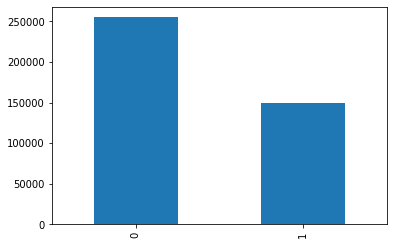

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


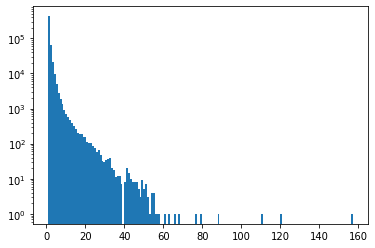

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()